# A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams 
This is the code for the paper entitiled "**A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams**" accepted in IEEE Internet of Things Magazine.  
Authors: Li Yang (lyang339@uwo.ca) and Abdallah Shami (Abdallah.Shami@uwo.ca)  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

**Notebook 2: Static machine learning algorithms**  
Aims:  
&nbsp; 1): Find the best performing static machine learning algorithm by considering both accuracy and time  
&nbsp; 2): Obtain the optimized learner using hyperparameter optimization techniques  

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
import time
import warnings
warnings.filterwarnings("ignore")

## Read the NSL-KDD dataset

In [2]:
#Read the training and test set
df1 = pd.read_csv("NSL_KDD_binary_train.csv")
df2 = pd.read_csv("NSL_KDD_binary_test.csv")

In [3]:
X_train = df1.iloc[:, :-1].values
y_train = df1.iloc[:, -1].values
X_test = df2.iloc[:, :-1].values
y_test = df2.iloc[:, -1].values

In [48]:
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0
22540,0,1,22,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0
22541,0,1,22,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1
22542,0,2,11,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0


## Training 5 static machine learning algorithms: 
### KNN, LR, RF, XGBoost, LightGBM

              precision    recall  f1-score   support

           0       0.66      0.97      0.79      9711
           1       0.96      0.62      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544

Accuracy: 0.7720014194464159


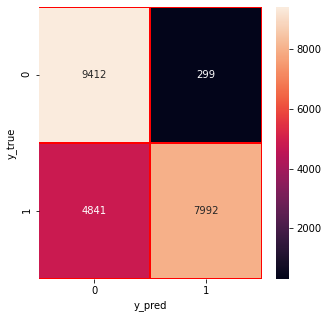

Wall time: 13 s


In [8]:
%%time 
# Print out execution time

# KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train) # Model training
y_pred = classifier.predict(X_test) # Model testing
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.60      0.90      0.72      9711
           1       0.88      0.55      0.68     12833

    accuracy                           0.70     22544
   macro avg       0.74      0.73      0.70     22544
weighted avg       0.76      0.70      0.70     22544

Accuracy: 0.7026703335699077


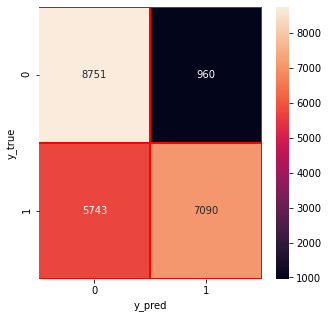

Wall time: 2.02 s


In [10]:
%%time
# Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.97      0.78      9711
           1       0.97      0.61      0.75     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.79      0.77     22544
weighted avg       0.83      0.77      0.76     22544

Accuracy: 0.7682753726046841


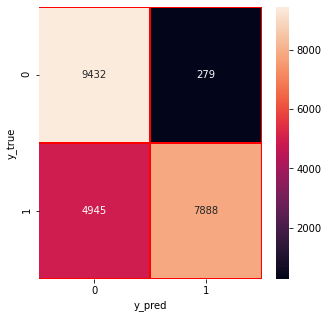

Wall time: 7.67 s


In [11]:
%%time
# Random forest algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      9711
           1       0.97      0.66      0.79     12833

    accuracy                           0.79     22544
   macro avg       0.83      0.82      0.79     22544
weighted avg       0.84      0.79      0.79     22544

Accuracy: 0.7940028388928317


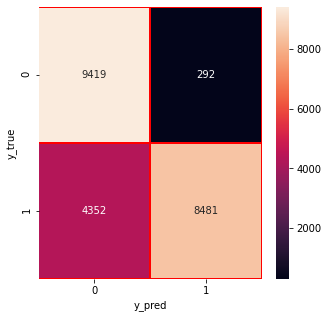

Wall time: 4.13 s


In [12]:
%%time
# XGBoost algorithm
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      9711
           1       0.97      0.66      0.78     12833

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.79     22544
weighted avg       0.84      0.79      0.79     22544

Accuracy: 0.7935149041873669


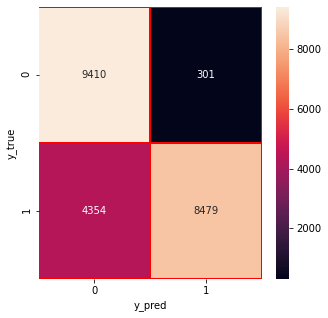

Wall time: 598 ms


In [13]:
%%time
# LightGBM algorithm
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Considering both accuracy and execution time, **LightGBM** performs the best among the five algorithms:  
Accuracy: 79.35%, time: 0.6s.  

# Hyperparameter optimization
Tune the hyperparameters of LightGBM to obtain optimal accuracy.

#### Optimize LightGBM by Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE)

In [14]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate': abs(float(params['learning_rate'])),
        "num_leaves": int(params['num_leaves']),
        "min_child_samples": int(params['min_child_samples']),
    }
    clf = lgb.LGBMClassifier( **params)
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    score = accuracy_score(y_test,prediction)
    return {'loss':-score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 20),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "learning_rate":hp.uniform('learning_rate', 0, 1),
    "num_leaves":hp.quniform('num_leaves',100,2000,100),
    "min_child_samples":hp.quniform('min_child_samples',10,50,5),
}

# Detect the optimal hyperparameter values
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("LightGBM: Hyperopt estimated optimum {}".format(best))

100%|███████████████████████████████████████████████| 50/50 [01:22<00:00,  1.64s/trial, best loss: -0.8021202980837473]
LightGBM: Hyperopt estimated optimum {'learning_rate': 0.014116868973595653, 'max_depth': 18.0, 'min_child_samples': 45.0, 'n_estimators': 340.0, 'num_leaves': 600.0}


              precision    recall  f1-score   support

           0       0.69      0.97      0.81      9711
           1       0.97      0.68      0.80     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

Accuracy: 0.8021202980837473


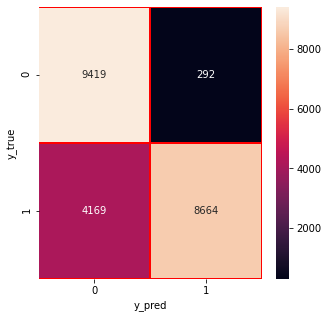

In [16]:
# Use the optimal hyperparameter values to train the optimized LightGBM model
clf = lgb.LGBMClassifier(max_depth=18, learning_rate= 0.014116868973595653, n_estimators = 340, 
                         num_leaves = 600, min_child_samples = 45)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Optimize LightGBM by particle swarm optimization (PSO)

In [40]:
#PSO
import optunity
import optunity.metrics

# Define the hyperparameter configuration space
search = {
    'n_estimators': [50, 500],
    'max_depth': [5, 50],
    'learning_rate': (0, 1),
    "num_leaves":[100, 2000],
    "min_child_samples":[10, 50],
         }
# Define the objective function
def performance(n_estimators=None, max_depth=None,learning_rate=None,num_leaves=None,min_child_samples=None):
    clf = lgb.LGBMClassifier(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   learning_rate=float(learning_rate),
                                   num_leaves=int(num_leaves),
                                   min_child_samples=int(min_child_samples),
                                  )
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    score = accuracy_score(y_test,prediction)
    return score

# Detect the optimal hyperparameter values
optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=50,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'n_estimators': 78.1513671875, 'max_depth': 6.808439403826421, 'learning_rate': 0.20349557055687642, 'num_leaves': 1302.232421875, 'min_child_samples': 27.56027628043679}
Accuracy:0.8069109297374024


              precision    recall  f1-score   support

           0       0.70      0.97      0.81      9711
           1       0.97      0.68      0.80     12833

    accuracy                           0.81     22544
   macro avg       0.83      0.83      0.81     22544
weighted avg       0.85      0.81      0.81     22544

Accuracy: 0.8069109297374024


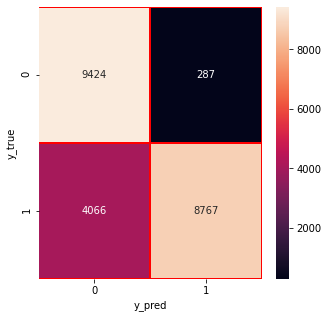

In [17]:
clf = lgb.LGBMClassifier(max_depth=6, learning_rate= 0.20349557055687642, n_estimators = 78, 
                         num_leaves = 1302, min_child_samples = 27)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

After hyperparameter optimization, the accuracy of LightGBM can be improved from 79.35% to 80.69%.

### Save and load the optimized model

In [47]:
import joblib
# Output a pickle file to save the trained model
joblib.dump(clf, 'Optimized_lightGBM.pkl') 

['Optimized_lightGBM.pkl']

In [49]:
# The trained model can be loaded directly for future testing
savestkrf = joblib.load('Optimized_lightGBM.pkl') 

In [50]:
y_pred = savestkrf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[9424  287]
 [4066 8767]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81      9711
           1       0.97      0.68      0.80     12833

    accuracy                           0.81     22544
   macro avg       0.83      0.83      0.81     22544
weighted avg       0.85      0.81      0.81     22544

0.8069109297374024


However, the accuracy is still at a low level. A model with the accuracy of 80% cannot detect attacks accurately.

## Find the reason why the accuracy is low

Read the entire dataset (training+test)

In [18]:
df = pd.read_csv("NSL_KDD_binary(train+test).csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, random_state = 0,shuffle=False)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     69135
           1       0.99      0.92      0.96     64531

    accuracy                           0.96    133666
   macro avg       0.96      0.96      0.96    133666
weighted avg       0.96      0.96      0.96    133666

Accuracy: 0.9604237427618093


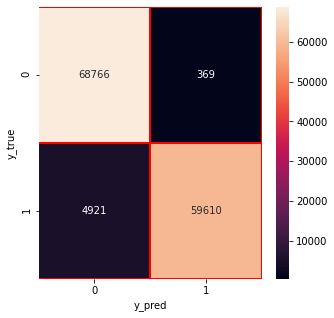

In [26]:
# LightGBM algorithm
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Monitor how the accuracy changes over time

In [27]:
# Record the real-time accuracy based on timestamp/sample index
acc = []
acc_sum = 0
for i in range(0, len(y_test)):
    if y_test[i] == y_pred[i]:
        acc_sum = acc_sum + 1  
    accuracy = acc_sum/(i+1)
    acc.append(accuracy)

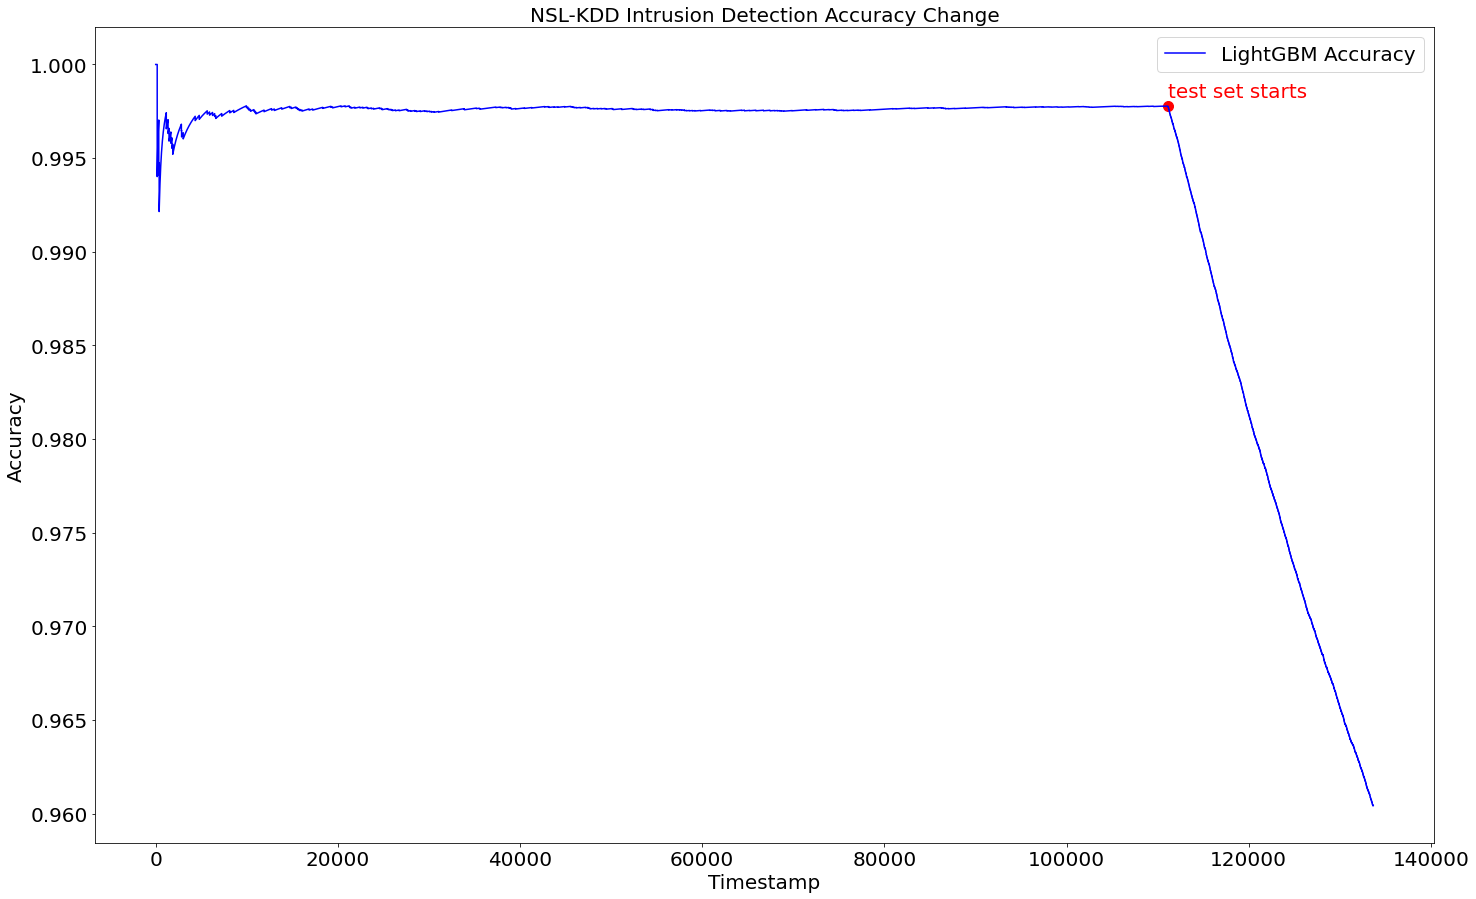

In [47]:
# Plot the accuracy changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15)) 
plt.clf() 
plt.plot(acc,'-b',label='LightGBM Accuracy')

plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df2)],s=100,c='r')
plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('NSL-KDD Intrusion Detection Accuracy Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Accuracy')

plt.draw()

* The samples in the training set have similar statistical distribution. However, when the statistical distribution from the training set to the test set has changed. Hence, the model trained on the training set cannot accurately detect attacks in the test set.   
* In the figure, it can be seen that when the test set starts, the current accuracy starts to drop significantly due to the statistical distribution change in the dataset.  
* This kind of statistical distribution change is called **concept drift**.